In [4]:
import pandas as pd

# --- Settings ---
input_csv_filename = 'Datalog_A.csv'
output_csv_filename = 'Datalog_Filtered_A.csv'
temperature_threshold = -120.0
# ----------------

try:
    # 1. Load the CSV file into a DataFrame
    df = pd.read_csv(input_csv_filename)
    print(f"Successfully loaded '{input_csv_filename}'. Found {len(df)} rows.")

    # 2. Identify all sensor columns (e.g., S0, S1, S2...)
    sensor_columns = [col for col in df.columns if col.startswith('S')]
    
    # Ensure sensor columns are numeric for comparison, coercing errors
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 3. Filter the DataFrame
    # Create a boolean mask. It's 'True' for any row that has at least one
    # sensor reading below the threshold.
    mask_to_remove = (df[sensor_columns] < temperature_threshold).any(axis=1)

    # We use the tilde (~) to invert the mask, keeping only the rows
    # where ALL sensor values are >= the threshold.
    filtered_df = df[~mask_to_remove]
    
    print(f"Removed {mask_to_remove.sum()} rows with temperatures below {temperature_threshold}°C.")
    print(f"{len(filtered_df)} rows remaining.")

    # 4. Save the filtered data to a new CSV file
    if not filtered_df.empty:
        filtered_df.to_csv(output_csv_filename, index=False)
        print(f"Successfully saved filtered data to '{output_csv_filename}'.")
    else:
        print("No data remained after filtering. Output file was not created.")

except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded 'Datalog_A.csv'. Found 6989 rows.
Removed 24 rows with temperatures below -120.0°C.
6965 rows remaining.
Successfully saved filtered data to 'Datalog_Filtered_A.csv'.


/tmp/ipykernel_5477/635485770.py:21: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_df = df[sensor_columns].resample('10S').mean()


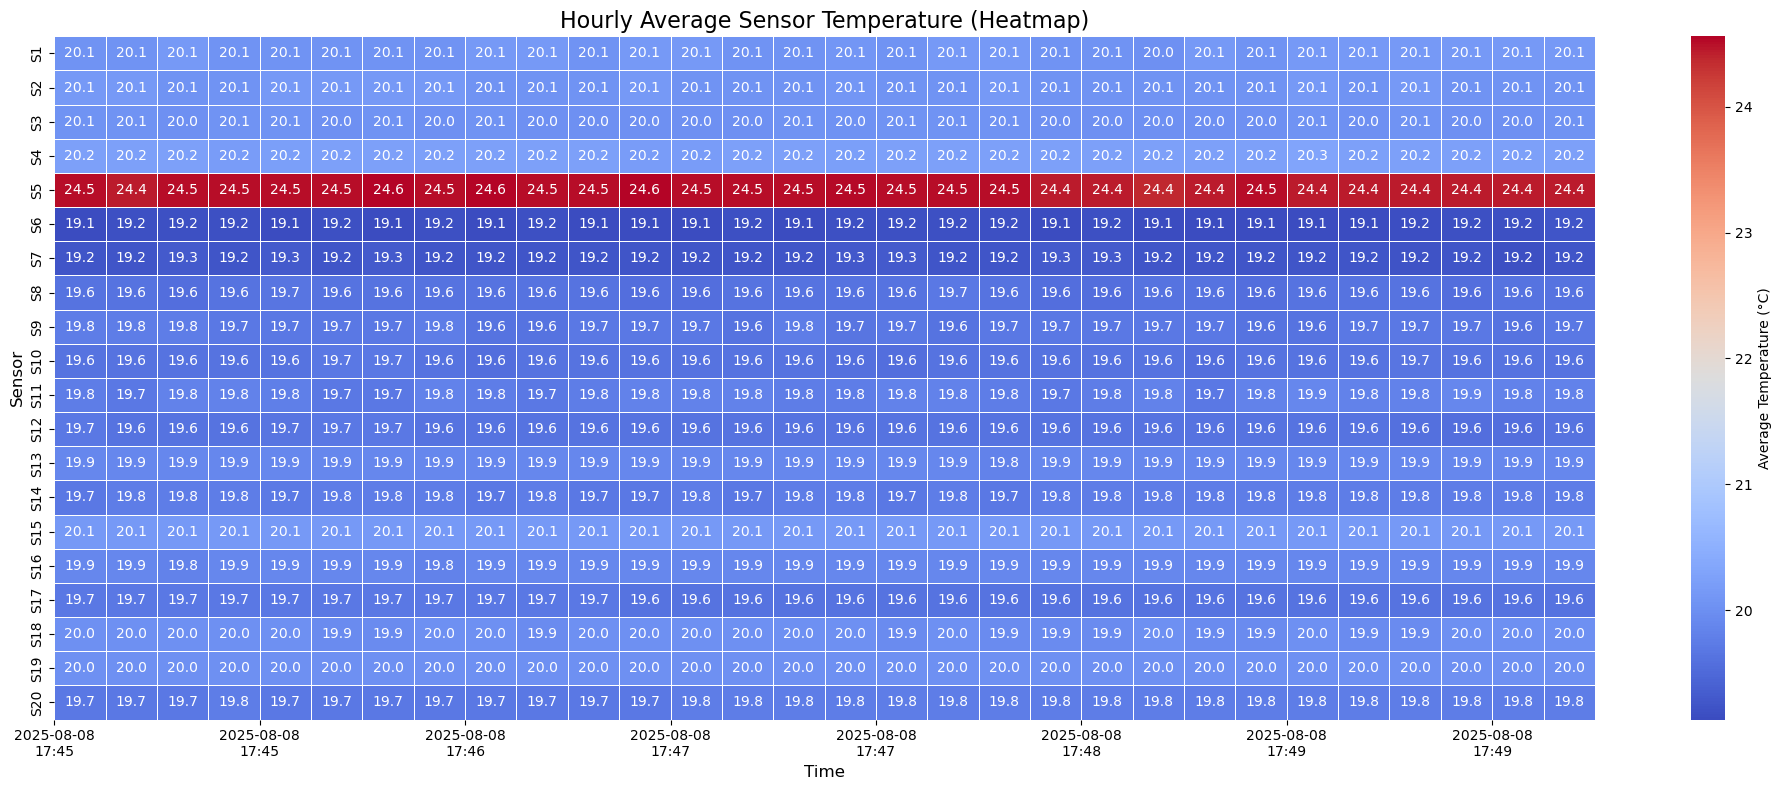

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Script Settings ---
input_csv_filename = 'Datalog_20250808_1745-1750.csv' # Assuming Datalog.csv is the input
# ---------------------

try:
    # Load and prepare the data
    df = pd.read_csv(input_csv_filename)
    df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df.set_index('Timestamp', inplace=True)

    sensor_columns = sorted([col for col in df.columns if col.startswith('S')], key=lambda x: int(x[1:]))
    for col in sensor_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Resample to hourly averages
    resampled_df = df[sensor_columns].resample('10S').mean()
    heatmap_data = resampled_df.transpose()

    # --- Graphing ---
    plt.figure(figsize=(20, 8))
    ax = sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        linewidths=.5,
        cbar_kws={'label': 'Average Temperature (°C)'},
        annot=True,   # This tells seaborn to write the data value in each cell.
        fmt='.1f'
    )

    # --- (CORRECTED) X-AXIS FORMATTING ---
    label_every_n = 4
    tick_positions = range(0, len(heatmap_data.columns), label_every_n)
    
    # The fix is here: %h is changed to %H
    tick_labels = [heatmap_data.columns[i].strftime('%Y-%m-%d\n%H:%M') for i in tick_positions]

    # Apply the positions and labels to the x-axis
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=0, ha='center')

    # --- End of Formatting ---

    plt.title('Hourly Average Sensor Temperature (Heatmap)', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Sensor', fontsize=12)
    plt.tight_layout()

    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{input_csv_filename}' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [11]:
# Select all columns that have 'S' in their name
s_columns = df.filter(like='S')

# Calculate the difference between the max and min for each column
s_range = s_columns.max() - s_columns.min()

In [15]:
s_range

S1     2.75
S2     2.62
S3     2.87
S4     2.56
S5     2.50
S6     1.81
S7     1.88
S8     1.75
S9     1.94
S10    1.69
S11    2.44
S12    2.56
S13    2.63
S14    2.81
S15    2.75
S16    2.50
S17    2.62
S18    2.43
S19    2.56
S20    2.56
dtype: float64